# Ejemplo diagrama de Bode de un circuito con fuente dependiente

Consideremos el siguente circuito con fuente dependiente:

![fuente_dependiente.png](images/fuente_dependiente.png)

Realizar el diagrama de Bode de la función de transferencia $A$ utilizando las librerías vistas.
Siendo

$A=I_{out}/V_{vin}$

## Resolución

Vamos a utilizar las librerias Sympy para calculo simbólico. 

In [1]:
import sympy as sp
from sympy import symbols, Eq, I, pi, re, im, Abs, arg
from sympy.plotting import plot_implicit
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import bode_plot
import numpy as np

Definimos las variables de la función de transferencia. En este caso $R1$, $R2$, $R_L$, $C1$ y $C2$, como elementos del circuito y $S$, como la variable compleja 

In [2]:
R1, R2, RL, C1, C2, K, S = sp.symbols('R1 R2 RL C1 C2 K S', real=True)

Definimos el termino constante de la función de transferencia:

In [3]:
Kte = K*C1*R1/(R2+RL)
Kte

C1*K*R1/(R2 + RL)

De igual manera definimos el numerador y denominador

In [4]:
Num = S*(S/(1/(C2*R2))+1)
Num

S*(C2*R2*S + 1)

In [5]:
Den = (S/((R2+RL)/(C2*R2*RL)) +1)*(R1*C1*S+1)
Den

(C1*R1*S + 1)*(C2*R2*RL*S/(R2 + RL) + 1)

La función de transferencia queda:

In [6]:
A = Kte*Num/Den
A

C1*K*R1*S*(C2*R2*S + 1)/((R2 + RL)*(C1*R1*S + 1)*(C2*R2*RL*S/(R2 + RL) + 1))

In [7]:
H = sp.expand(A)
H

C1*C2*K*R1*R2*S**2/(C1*C2*R1*R2**2*RL*S**2/(R2 + RL) + C1*C2*R1*R2*RL**2*S**2/(R2 + RL) + C1*R1*R2*S + C1*R1*RL*S + C2*R2**2*RL*S/(R2 + RL) + C2*R2*RL**2*S/(R2 + RL) + R2 + RL) + C1*K*R1*S/(C1*C2*R1*R2**2*RL*S**2/(R2 + RL) + C1*C2*R1*R2*RL**2*S**2/(R2 + RL) + C1*R1*R2*S + C1*R1*RL*S + C2*R2**2*RL*S/(R2 + RL) + C2*R2*RL**2*S/(R2 + RL) + R2 + RL)

Mediante el uso de la función simplify se puede simplificar la expresión:

In [8]:
H = sp.simplify(A)
H

C1*K*R1*S*(C2*R2*S + 1)/((C1*R1*S + 1)*(C2*R2*RL*S + R2 + RL))

Para poder operar utilizar esta expresión como una función de transferencia de un sistema LTI, en neceserio emplear la función $TransferFunction$. Esta función toma como argumento los polinomios del númerador y denominador de la función que queremos representar.

Para obtener esos polinomios podemos hacer uso de la función que nos devuelve el numerador y denominador de las nuestra ecuación $A$:

In [9]:
H.as_numer_denom()

(C1*K*R1*S*(C2*R2*S + 1), (C1*R1*S + 1)*(C2*R2*RL*S + R2 + RL))

In [10]:
TF= TransferFunction(H.as_numer_denom()[0], H.as_numer_denom()[1], S)
TF

TransferFunction(C1*K*R1*S*(C2*R2*S + 1), (C1*R1*S + 1)*(C2*R2*RL*S + R2 + RL), S)

Mediante la función $xreplace$ podemos asignar valores a las variables de la función de transferencia:

In [11]:
TF1=TF.xreplace({R1: 5000, R2: 10000, RL:1000, C1: 10.0e-6, C2: 1.0e-6,K:100e3})

In [12]:
TF1

TransferFunction(5000.0*S*(0.01*S + 1), (0.05*S + 1)*(10.0*S + 11000), S)

In [13]:
sp.nsimplify(TF1)

TransferFunction(5000*S*(S/100 + 1), (S/20 + 1)*(10*S + 11000), S)

### Gráfica de polos y ceros de la función de transferencia

Mediante la función $pole_zero_plot$ podemos graficar la ubicación de los polos y ceros del función de transfencia en el plano complejo:

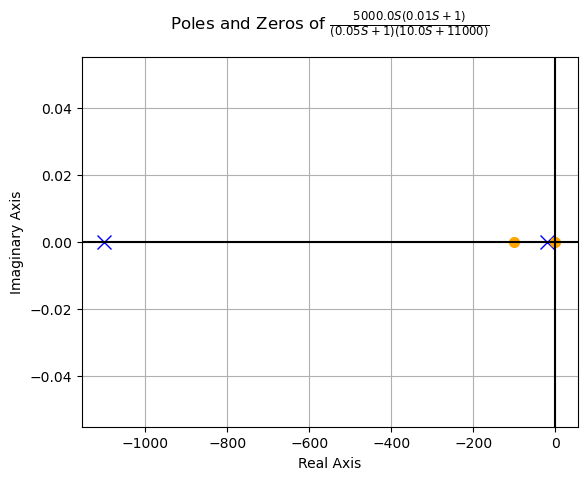

In [14]:
pole_zero_plot(TF1)

### Gráfica del diagrama de Bode de la función de transferencia

Mediante la función $bode_plot$ podemos obtener las gráficas de Bode de la función de transferencia:

<IPython.core.display.Javascript object>


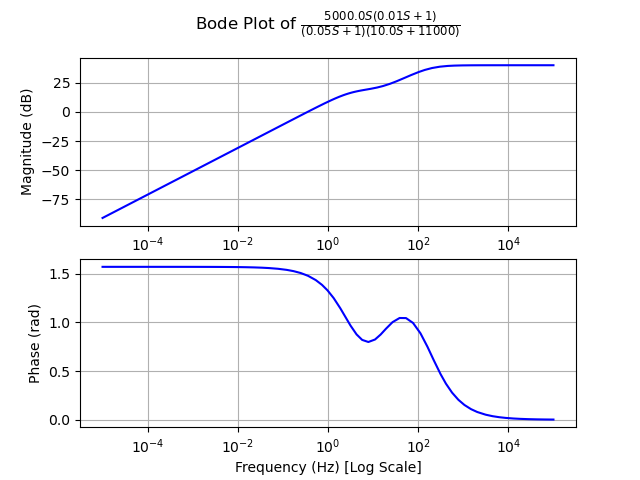

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

bode_plot(TF1, freq_unit = 'Hz' )

In [16]:
Hv=H.xreplace({R1: 5000, R2: 10000, RL:1000, C1: 10.0e-6, C2: 1.0e-6,K:100e3, S:2*pi*10000*I})
Hv

100000000.0*I*pi*(1 + 200.0*I*pi)/((1 + 1000.0*I*pi)*(11000 + 200000.0*I*pi))

In [17]:
arg(Hv).evalf()

0.0162320172409385

In [18]:
(arg(Hv)*180/pi).evalf()

0.930026080889362

In [19]:
Abs(Hv).evalf()

99.9848002595360

In [20]:
(20*sp.log(Abs(Hv))).evalf()

92.1003635406135

## Gráfica del diagrama polar de la función de tranferencia

Para este caso vamos a utilizar la librería scipy 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [22]:
numerador = TF1.num
numerador

5000.0*S*(0.01*S + 1)

In [23]:
coeficientesNume=sp.Poly(numerador).all_coeffs()
#numerador = 1

In [24]:
denominador = TF1.den
denominador

(0.05*S + 1)*(10.0*S + 11000)

In [25]:
coeficientesDen=sp.Poly(denominador).all_coeffs()
coeficientesDen

[0.500000000000000, 560.000000000000, 11000.0000000000]

In [26]:
denominador = [float(x) for x in coeficientesDen]
numerador = [float(x) for x in coeficientesNume]

In [27]:
sys =signal.TransferFunction(numerador, denominador)

In [28]:
w, h = signal.freqresp(sys)

### Graficar en el plano complejo

<IPython.core.display.Javascript object>


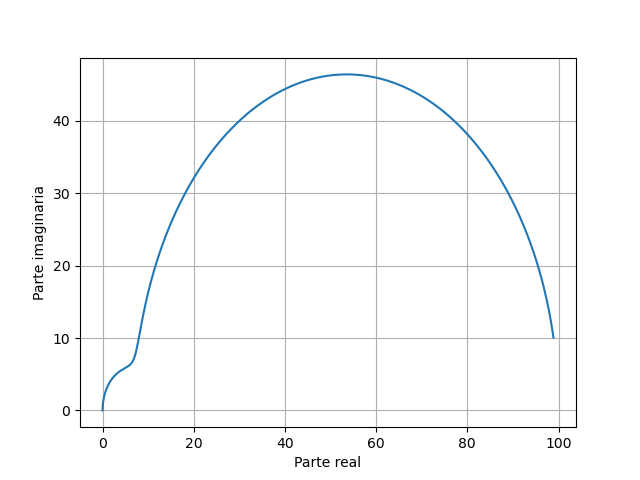

In [29]:
fig, ax = plt.subplots()
ax.plot(h.real, h.imag)
ax.set_xlabel('Parte real')
ax.set_ylabel('Parte imaginaria')
ax.grid(True)

plt.show()

También podemos realizar el diagrama de Bode con scipy

In [30]:
w, mag, phase = signal.bode(sys)

<IPython.core.display.Javascript object>


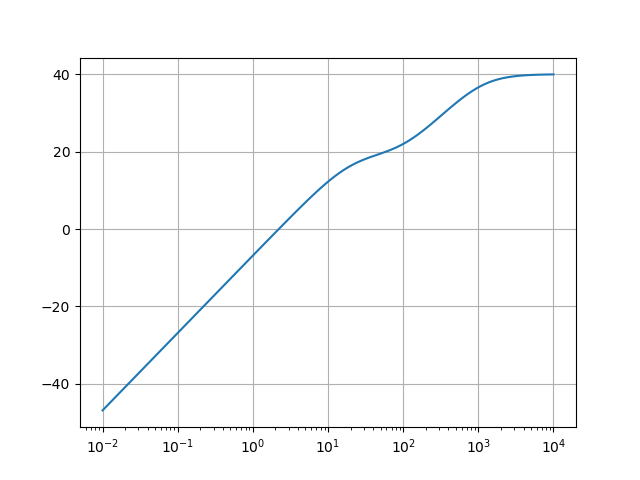

<IPython.core.display.Javascript object>


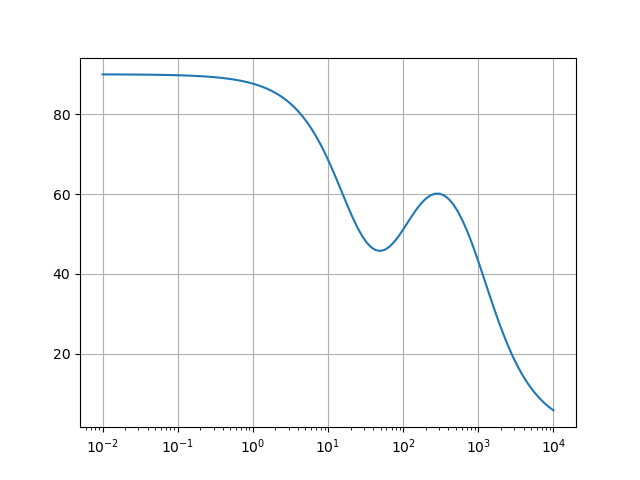

In [31]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.show()
